In [0]:
import pandas as pd

In [2]:
df = pd.read_csv('hd_value.csv',parse_dates=['review_date'])
df.head()

Unnamed: 0  product_parent  ...  sentiment  value_score
0           0       235105995  ...  -0.163889     0.233201
1           1       108191918  ...  -0.055556     0.211501
2           2       791081896  ...   0.222857     0.044641
3           3       199558933  ...   0.250000     0.300544
4           4       303775294  ...   0.508889     0.500864

[5 rows x 11 columns]

In [0]:
df = df[['product_parent', 'star_rating', 'review_date']]

对某个特定的产品进行分析。

In [4]:
product = pd.DataFrame(df[df['product_parent']==758099411])
meanstar = product['star_rating'].mean()
meanstar

4.297196261682243

In [75]:
timeseries = product.groupby('review_date').sum()
timeseries['count'] = product.groupby('review_date').count()['star_rating']
timeseries['bad_star'] = product[product['star_rating']<meanstar].groupby('review_date').count()['star_rating']
timeseries['bad_star'] = timeseries['bad_star'].fillna(0)
timeseries['good_star'] = product[product['star_rating']>meanstar].groupby('review_date').count()['star_rating']
timeseries['good_star'] = timeseries['good_star'].fillna(0)
timeseries = timeseries.drop('product_parent', axis=1)
timeseries.head()

star_rating  count  bad_star  good_star
review_date                                         
2008-11-08             5      1       0.0        1.0
2009-01-10             5      1       0.0        1.0
2009-03-07             5      1       0.0        1.0
2009-06-23             5      1       0.0        1.0
2009-07-04             5      1       0.0        1.0

In [76]:
sequenttime = pd.DataFrame(columns=['sum_star','count'],index=pd.date_range('2008-11-08', '2015-08-31'))
sequenttime['sum_star'] = timeseries['star_rating']
sequenttime['count'] = timeseries['count'].astype(int)
sequenttime['bad_star'] = timeseries['bad_star']
sequenttime['good_star'] = timeseries['good_star']
sequenttime = sequenttime.fillna(0)
sequenttime.head()

sum_star  count  bad_star  good_star
2008-11-08       5.0    1.0       0.0        1.0
2008-11-09       0.0    0.0       0.0        0.0
2008-11-10       0.0    0.0       0.0        0.0
2008-11-11       0.0    0.0       0.0        0.0
2008-11-12       0.0    0.0       0.0        0.0

In [7]:
for i in range(10,sequenttime.shape[0]):
  if (sequenttime['count'].iloc[i]-sequenttime['count'].iloc[i-1]) > 2:
    if sequenttime['count'].iloc[i-9:i-1].sum() > 0:
      starbefore = (sequenttime['sum_star'].iloc[i-9:i-1].sum())/(sequenttime['count'].iloc[i-9:i-1].sum())
      if starbefore < meanstar:
        print(sequenttime.iloc[i])

sum_star    11.0
count        3.0
Name: 2014-01-04 00:00:00, dtype: float64
sum_star    15.0
count        3.0
Name: 2014-09-19 00:00:00, dtype: float64
sum_star    12.0
count        3.0
Name: 2014-10-07 00:00:00, dtype: float64
sum_star    14.0
count        3.0
Name: 2015-08-07 00:00:00, dtype: float64


In [0]:
sequenttime.to_csv('TimeSeries.csv',index=False,index_label=None)

In [0]:
import numpy as np
x = np.array([])
y = np.array([])
z = np.array([])
for i in range(1,int(sequenttime.shape[0]/15)):
  x = np.append(x,sequenttime['count'][i*15:(i+1)*15].sum()-sequenttime['count'][(i-1)*15:i*15].sum())
  badstarbefore = sequenttime['bad_star'][(i-1)*15:i*15].sum()
  goodstarbefore = sequenttime['good_star'][(i-1)*15:i*15].sum()
  allstarbefore = sequenttime['count'][(i-1)*15:i*15].sum()
  if allstarbefore > 0:
    y = np.append(y,badstarbefore/allstarbefore)
    z = np.append(z,goodstarbefore/allstarbefore)
  else:
    y = np.append(y,0)
    z = np.append(z,0)

In [90]:
print(np.corrcoef(x,y))
print(np.corrcoef(x,z))
print(np.corrcoef(y,z))

[[ 1.         -0.07733824]
 [-0.07733824  1.        ]]
[[ 1.         -0.11050112]
 [-0.11050112  1.        ]]
[[ 1.         -0.21655532]
 [-0.21655532  1.        ]]


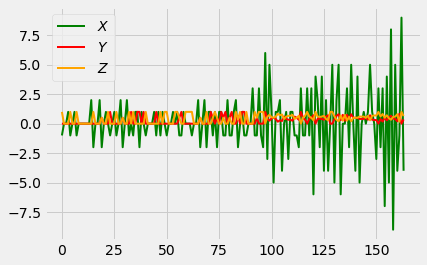

In [87]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
plt.plot(x,linewidth='2',c='green',label='$X$')
plt.plot(y,linewidth='2',c='red',label='$Y$')
plt.plot(z,linewidth='2',c='orange',label='$Z$')
plt.legend()
plt.show()